In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
# Examine head of data
df = pd.read_csv("Final_P_3.csv")
df.head(100)

,Year,Player,Position,Age,School,Height,Weight,40 Yard Dash,Vertical,Bench Reps,Broad Jump,3Cone,Shuttle,Round,Team,Conference
0,2020,Jedrick Wills,OL,20.0,Alabama,6.4 ft,312,5.05,34.5,NaN,113.0,NaN,4.84,1.0,Cleveland Browns,SEC
1,2020,Jerry Jeudy,WR,20.0,Alabama,6.1 ft,193,4.45,35.0,NaN,120.0,NaN,4.53,1.0,Denver Broncos,SEC
2,2020,Henry Ruggs III,WR,21.0,Alabama,5.11 ft,188,4.27,42.0,NaN,131.0,NaN,NaN,1.0,Las Vegas Raiders,SEC
3,2020,Tua Tagovailoa,QB,22.0,Alabama,6.1 ft,217,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Miami Dolphins,SEC
4,2020,Xavier McKinney,S,NaN,Alabama,6.1 ft,201,4.63,36.0,19.0,122.0,NaN,NaN,2.0,New York Giants,SEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020,Lavert Hill,CB,NaN,Michigan,5.10 ft,190,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,Big 10
96,2020,Josiah Scott,CB,NaN,Michigan State,5.9 ft,185,4.42,NaN,17.0,NaN,NaN,NaN,4.0,Jacksonville Jaguars,Big 10
97,2020,Kenny Willekes,DL,NaN,Michigan State,6.3 ft,264,4.87,32.5,32.0,119.0,7.39,NaN,7.0,Minnesota Vikings,Big 10
98,2020,Brian Lewerke,QB,NaN,Michigan State,6.2 ft,213,4.95,31.0,NaN,113.0,7.14,4.40,NaN,NaN,Big 10


In [3]:
# JJ Molson will play mostly as a K.
df.at[180, "Position"] = "K"

In [4]:
df.groupby("Position").size()

Position
CB    19
DL    25
K      1
LB    25
LS     1
OL    34
P      6
QB    11
RB    17
S     11
TE    15
WR    35
dtype: int64

In [5]:
df[df.Position=="K"]

,Year,Player,Position,Age,School,Height,Weight,40 Yard Dash,Vertical,Bench Reps,Broad Jump,3Cone,Shuttle,Round,Team,Conference
180,2020,JJ Molson,K,NaN,UCLA,5.11 ft,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pac 12


In [6]:
df[df.Position=="LS"]

,Year,Player,Position,Age,School,Height,Weight,40 Yard Dash,Vertical,Bench Reps,Broad Jump,3Cone,Shuttle,Round,Team,Conference
65,2020,Steven Wirtel,LS,NaN,Iowa State,6.4 ft,235,4.76,26.0,NaN,120.0,7.12,4.28,1.0,NaN,Big 10


In [7]:
# Steven Wirtel is a LS.
df.at[65, "Position"] = "LS"

In [8]:
df.loc[df.Position=="P", "Position"] = "P"

In [9]:
# All of our "hybrid" positions have been dealt with. Let's now examine preliminary trends.
round_info = pd.crosstab(index=df["Position"], columns=df["Round"], margins=True) 
round_info / round_info.loc["All"]

Round,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
Position,,,,,,,,
CB,0.090909,0.066667,0.083333,0.260870,0.047619,0.000000,0.176471,0.107143
DL,0.090909,0.000000,0.166667,0.086957,0.238095,0.111111,0.176471,0.128571
LB,0.136364,0.133333,0.208333,0.086957,0.190476,0.055556,0.176471,0.142857
LS,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007143
OL,0.272727,0.066667,0.291667,0.130435,0.190476,0.333333,0.000000,0.192857
P,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.058824,0.014286
QB,0.136364,0.066667,0.000000,0.043478,0.000000,0.055556,0.117647,0.057143
RB,0.000000,0.133333,0.083333,0.130435,0.000000,0.000000,0.000000,0.050000
S,0.000000,0.133333,0.083333,0.086957,0.047619,0.055556,0.058824,0.064286


In [10]:
round_info = pd.crosstab(index=df["Position"], columns=df["Round"], margins=True) 
round_info.div(round_info["All"], axis=0)

Round,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
Position,,,,,,,,
CB,0.133333,0.066667,0.133333,0.400000,0.066667,0.000000,0.200000,1.0
DL,0.111111,0.000000,0.222222,0.111111,0.277778,0.111111,0.166667,1.0
LB,0.150000,0.100000,0.250000,0.100000,0.200000,0.050000,0.150000,1.0
LS,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
OL,0.222222,0.037037,0.259259,0.111111,0.148148,0.222222,0.000000,1.0
P,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.0
QB,0.375000,0.125000,0.000000,0.125000,0.000000,0.125000,0.250000,1.0
RB,0.000000,0.285714,0.285714,0.428571,0.000000,0.000000,0.000000,1.0
S,0.000000,0.222222,0.222222,0.222222,0.111111,0.111111,0.111111,1.0


In [11]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1, random_state=0, noise=4, bias=100.0)

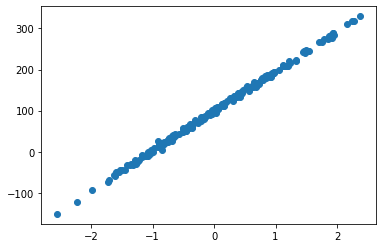

In [12]:
plt.scatter(X, y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

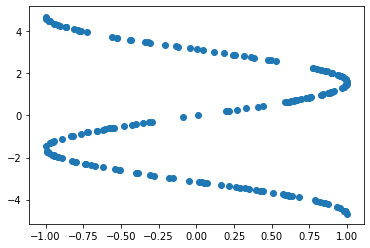

In [14]:
from sklearn.datasets import make_s_curve

data, color = make_s_curve(200, random_state=0)
plt.scatter(data[:,0], color)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [18]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [96.30213889]
y-axis intercept:  99.44157292599853


In [19]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 123.49370712301307
Predicted output: 128.5702636334791
Prediction Error: 5.076556510466034


In [20]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,128.570264,123.493707,5.076557
1,-22.908850,-28.510902,5.602053
2,247.051490,244.672526,2.378963
3,-54.840006,-49.358670,-5.481335
4,209.168296,208.474556,0.693740
...,...,...,...
195,138.983087,139.445566,-0.462479
196,-4.558141,-10.308406,5.750265
197,15.581945,20.309820,-4.727875
198,193.696134,194.976669,-1.280535


In [21]:
x_min = X.min()
x_max = X.max()

In [22]:
y_min_actual = y.min()
y_max_actual = y.max()

In [23]:
y_min_actual = y.min()
y_max_actual = y.max()

In [24]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: -150.9540047123573
Predicted Min Value: [-146.41680691]
Actual Max Value: 329.46126082722554
Predicted Max Value: [328.94351204]
